In [3]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Task 1

In [14]:
def polylogplot(alpha, n):
    # The powers we want from 0 to n
    pows = np.linspace(0,n,n+1)
    # Multiply the powers by log 2 so that taking the exp gives 2^n
    x = np.log(2)*pows
    x = np.exp(x)
    # x^alpha
    pts = np.power(x,alpha)
    # full expression
    pts = pts*np.log(x)
    # print(pts)
    
    # plotting
    plt.rcParams['text.usetex'] = True
    plt.rcParams.update({'font.size': 22})

    plt.figure(figsize=(12, 8))

    plt.loglog(x, pts, "-k", label=r"$x^{{{}}}\log (x)$".format(alpha), markersize=5, markerfacecolor=(0, 0.447, 0.741, 1))
    
    plt.legend(loc="upper left")
    
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f(x)$")

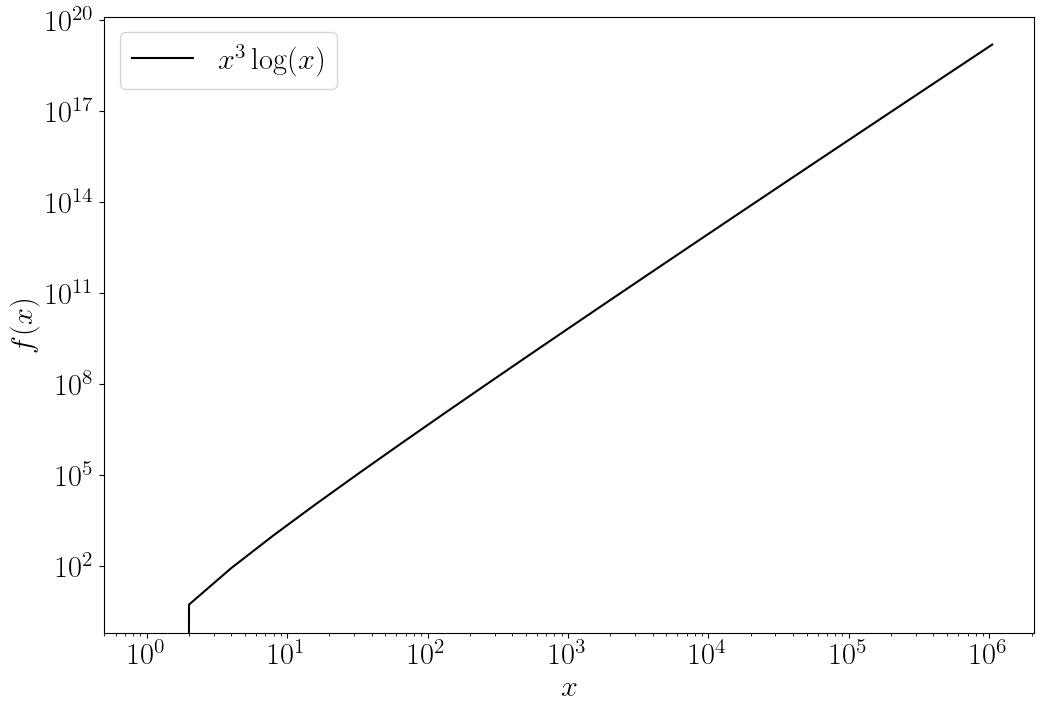

In [15]:
polylogplot(3,20)

# Task 2

# Task 3

In [4]:
def MMStsn(A, B):
    
    # Initialise C = A@B
    C = np.zeros((len(A), len(A)))
    
    if len(A)>1:
        
        # Break up matrix
        A11 = A[:len(A)//2, :len(A)//2]
        A21 = A[len(A)//2:, :len(A)//2]
        A12 = A[:len(A)//2, len(A)//2:]
        A22 = A[len(A)//2:, len(A)//2:]
        B11 = B[:len(B)//2, :len(B)//2]
        B21 = B[len(B)//2:, :len(B)//2]
        B12 = B[:len(B)//2, len(B)//2:]
        B22 = B[len(B)//2:, len(B)//2:]
        # print(A11, A22, B11, B22)
        # print(A12)
        
        # Compute Ms
        M1 = MMStsn((A11 + A22), (B11 + B22))
        M2 = MMStsn((A21 + A22), B11)
        M3 = MMStsn(A11, (B12 - B22))
        M4 = MMStsn(A22, (B21 - B11))
        M5 = MMStsn((A11 + A12), B22)
        M6 = MMStsn((A21 - A11), (B11 + B12))
        M7 = MMStsn((A12 - A22), (B21 + B22))
        # print(M1)

        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6
        
        # print(C)

        C[0:len(C)//2, 0:len(C)//2] = C11
        C[len(C)//2:, 0:len(C)//2] = C12
        C[0:len(C)//2, len(C)//2:] = C21
        C[len(C)//2:, len(C)//2:] = C22

    else:
        # print (A,B)
        C = A[0][0]*B[0][0]

    return C


        

In [5]:
# np.random.seed(19)

# Generate random matrices
A = np.random.randint(10, size=(np.power(2,3),np.power(2,3)))
B = np.random.randint(10, size=(np.power(2,3),np.power(2,3)))

# print (A, B)

MMStsn(A, B) 

array([[162., 274., 195., 171., 153., 120., 184., 182.],
       [206., 259., 160., 188.,  93., 150., 170., 209.],
       [180., 247., 202., 184., 109., 168., 189., 176.],
       [148., 164., 130., 111.,  95., 102., 103.,  93.],
       [155., 228., 165., 154.,  94., 137., 158., 174.],
       [119., 209., 130., 150.,  97.,  82., 139., 154.],
       [208., 241., 199., 158., 121., 132., 142., 145.],
       [155., 299., 210., 184., 176., 159., 212., 194.]])

In [6]:
# Compare to inbuilt multiplication
A@B

array([[162, 206, 180, 148, 155, 119, 208, 155],
       [274, 259, 247, 164, 228, 209, 241, 299],
       [195, 160, 202, 130, 165, 130, 199, 210],
       [171, 188, 184, 111, 154, 150, 158, 184],
       [153,  93, 109,  95,  94,  97, 121, 176],
       [120, 150, 168, 102, 137,  82, 132, 159],
       [184, 170, 189, 103, 158, 139, 142, 212],
       [182, 209, 176,  93, 174, 154, 145, 194]])

In [7]:
# function that computes the standard matrix-matrix multiplication
def MMStd(A, B):
    # Detect matrix size
    n = len(A)
    nSize = (n, n)
    # Initialise result matrix
    C = np.zeros(nSize)
    
    # Loop through the matrix elements
    for i in range(n):
        for j in range(n):     
            for k in range(n): 
                # Use standard multiplication formula
                C[i][j] += A[i][k]*B[k][j]
    return C

In [12]:
# Initialise runtimes
runtimes = np.zeros((2,10))

# Compute runtimes and save for each method
for n in range(9):
    A = np.random.randint(10, size=(np.power(2,n),np.power(2,n)))
    B = np.random.randint(10, size=(np.power(2,n),np.power(2,n)))
    
    starttime = timeit.default_timer()
    CStd = MMStd(A, B)
    runtimes[0,n] = timeit.default_timer() - starttime
    starttime = timeit.default_timer()
    CStsn = MMStsn(A, B)
    runtimes[1,n] = timeit.default_timer() - starttime
    
    # See how many we've completed
    print(n)
    
# print(runtimes)


0
1
2
3
4
5
6
7
8
9


IndexError: index 10 is out of bounds for axis 1 with size 10

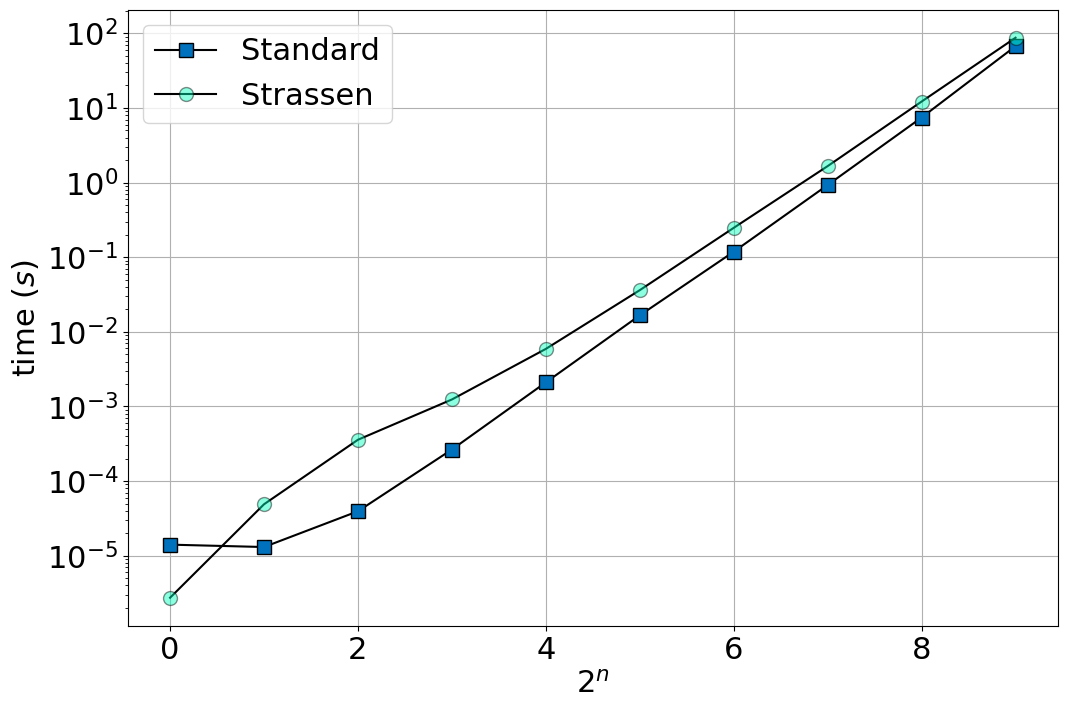

In [24]:
# Plot

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))

plt.semilogy(runtimes[0,:], "-ks", label=r"Standard", markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.semilogy(runtimes[1,:], "-ko", label=r"Strassen", markersize=10, markerfacecolor=(0, 1, 0.741, 0.447))

plt.legend(loc="upper left")

plt.xlabel(r"$2^n$")
plt.ylabel(r"time $(s)$")
plt.grid()